In [1]:
import pandas as pd 
df = pd.read_csv('../../Datasets/student-mat.csv' , delimiter = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
df.shape

(395, 33)

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
# Trainig and Test sets
from sklearn.model_selection import train_test_split
X = df[['studytime']]
y = df['G3']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state = 42)

In [6]:
# Simple linear regression for Study time and G3 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

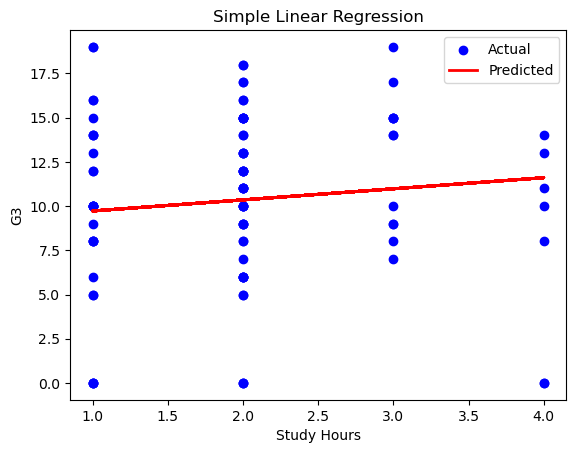

In [7]:
# Visualising the test set results 
import matplotlib.pyplot as plt 
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Study Hours')
plt.ylabel('G3')
plt.legend()
plt.title("Simple Linear Regression")
plt.show()


In [8]:
# Model Evaluation
from sklearn.metrics import mean_squared_error , r2_score
print("Coefficient (slope):", regressor.coef_)
print("Intercept:", regressor.intercept_)
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Coefficient (slope): [0.62682672]
Intercept: 9.097599164926931
R² score: -0.0028056973597805346
MSE: 23.10249052440101


In [9]:
# Multiple Linear Regression to predict G3 based on studyTime , Failures , G1 , G2 
X_mul = df[['studytime' , 'failures' , 'G1' ,'G2']]
y_mul = df['G3']
X_train_m , X_test_m , y_train_m , y_test_m  = train_test_split(X_mul , y_mul , test_size = 0.2 , random_state = 42)

In [10]:
regressor_m = LinearRegression()
regressor_m.fit(X_train_m , y_train_m)

LinearRegression()

In [11]:
y_pred_m = regressor_m.predict(X_test_m)

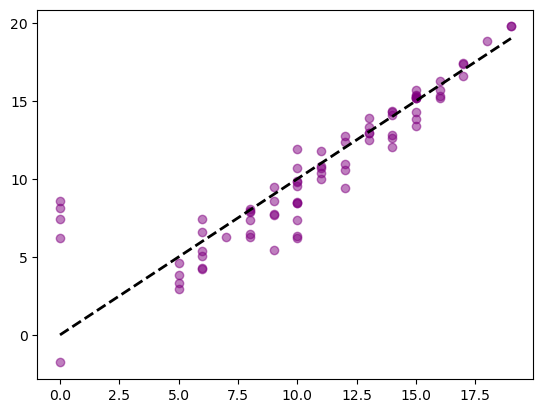

In [12]:
plt.scatter(y_test_m , y_pred_m , color= 'purple',alpha=0.5)
plt.plot([y_test_m.min() , y_test_m.max()],[y_test_m.min(),y_test_m.max()] , 'k--' , lw=2)

In [13]:
# Model Evaluation
print("Coefficient (slope):", regressor_m.coef_)
print("Intercept:", regressor_m.intercept_)
print("R² score:", r2_score(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))

Coefficient (slope): [-0.08258531 -0.44586729  0.14624272  0.9787659 ]
Intercept: -1.380063351889854
R² score: 0.7817079577534131
MSE: 4.476088644508929


In [24]:
# Training using the SGD regressor 
from sklearn.linear_model import SGDRegressor
X_train_sgd , X_test_sgd , y_train_sgd , y_test_sgd = train_test_split(X_mul , y_mul , test_size =0.2 , random_state = 42)
regressor_sgd = SGDRegressor(max_iter=100,learning_rate='invscaling' , eta0 = 0.01 , random_state = 42)
regressor_sgd.fit(X_train_sgd , y_train_sgd)

SGDRegressor(max_iter=100, random_state=42)

In [25]:
y_pred_sgd = regressor_sgd.predict(X_test_sgd)

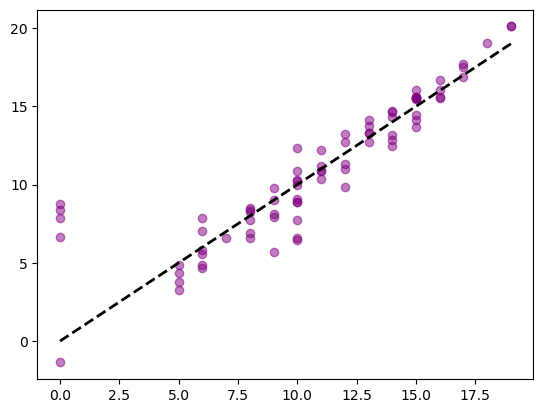

In [26]:
# Visualising the results 
plt.scatter(y_test_sgd , y_pred_sgd , color = 'purple' , alpha =0.5)
plt.plot([y_test_sgd.min() , y_test_sgd.max()],[y_test_sgd.min(),y_test_sgd.max()] , 'k--' , lw=2)

In [27]:
# Model Evaluation
print("Coefficient (slope):", regressor_sgd.coef_)
print("Intercept:", regressor_sgd.intercept_)
print("R² score:", r2_score(y_test_sgd, y_pred_sgd))
print("MSE:", mean_squared_error(y_test_sgd, y_pred_sgd))

Coefficient (slope): [-0.17437296 -0.5355611   0.12005191  0.98524198]
Intercept: [-0.60224336]
R² score: 0.7815736356460976
MSE: 4.4788429256685784
